<a href="https://colab.research.google.com/github/muroo123/pandas/blob/main/pandas_section3_%EB%8D%B0%EC%9D%B4%ED%83%80_%EC%9A%94%EC%95%BD%EA%B3%BC_%ED%86%B5%EA%B3%84_%ED%95%A8%EC%88%98%EC%99%80_%EC%A0%95%EB%A0%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

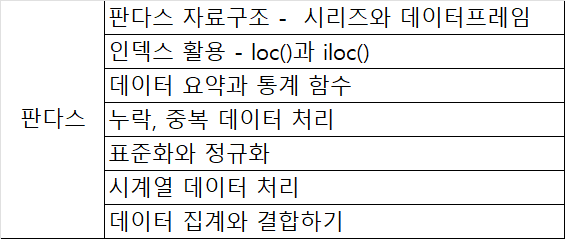

- 판다스 API : https://pandas.pydata.org/pandas-docs/stable/reference/index.html
- 넘파이 API : https://numpy.org/doc/stable/reference/index.html
- Python for Data Analysis(3판) : https://wesmckinney.com/book/

# 데이터프레임의 구조

### 데이터 구조 확인
- DataFrame.head(n=5) : 처음부터 n개 행의 데이터 가져오기
- DataFrame.tail(n=5) : 마지막 n개 행의 데이터 가져오기
- DataFrame.info(memory_usage='deep') : 데이터 프레임의 row 개수 및 각 column의 Non null, dtype 정보 및 메모리 사용량을 확인함
- DataFrame.shape : 데이터 프레임의 행, 열의 수를 tuple로 반환
- DataFrame.dtypes: float64,int64,object,datetime64 등 datatype을 반환
- datatype 설명 :    
https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes



In [1]:
# git 연결
!git clone https://github.com/muroo123/data.git

Cloning into 'data'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 34.35 KiB | 1.43 MiB/s, done.


In [57]:
# csv 파일로 DataFrame을 만들기
import pandas as pd

df = pd.read_csv("/content/data/score.csv", index_col=0, encoding='cp949')
df


,이름,성별,국어,영어,수학
번호,,,,,
1,강민경,여,88,86,76
2,강순애,여,94,79,60
3,강영하,남,55,47,83
4,강혜정,여,89,76,78
5,권명숙,여,88,73,61
...,...,...,...,...,...
96,하혜연,여,86,86,71
97,한경규,남,86,84,85
98,한수정,여,93,87,77


In [58]:
# 읽어온 df 의 내용 중 첫 5개 행을 출력
df.head(5)

,이름,성별,국어,영어,수학
번호,,,,,
1,강민경,여,88,86,76
2,강순애,여,94,79,60
3,강영하,남,55,47,83
4,강혜정,여,89,76,78
5,권명숙,여,88,73,61


In [59]:
# 읽어온 df 의 내용 중 끝 3개 행을 출력
df.tail(3)

,이름,성별,국어,영어,수학
번호,,,,,
98,한수정,여,93,87,77
99,한의병,남,83,59,63
100,한정희,여,83,78,52


In [60]:
# df의 row의 개수 및 각 column의 정보 및 메모리 사용량을 확인
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      100 non-null    object
 1   성별      100 non-null    object
 2   국어      100 non-null    int64 
 3   영어      100 non-null    int64 
 4   수학      100 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 21.3 KB


In [61]:
# df의 행, 열의 수를 확인(shape 사용)
df.shape

(100, 5)

In [62]:
# df의 dtypes 확인
df.dtypes

이름    object
성별    object
국어     int64
영어     int64
수학     int64
dtype: object

## 통계값 구하기
- DataFrame.describe() : 컬럼별 count, mean, std, min, max, Q1, Q2, Q3 등의 통계값 구하기
- DataFrame.count() : 개수
- DataFrame.sum() : 합계
- DataFrame.mean() : 평균
- DataFrame.median() : 중앙값
- DataFrame.std() : 표준편차
- DataFrame.var() : 분산
- DataFrame.quantile() : 분위수
- DataFrame.함수(axis=1)을 사용하여 행별 통계값을 구할 수 있음
   - axis=0 : 기본값이며, 행을 이동하며, 행과 행의 연산을 수행함
   - axis=1 : 컬럼을 이동하며 컬럼과 컬럼의 연산을 수행함

In [63]:
df

,이름,성별,국어,영어,수학
번호,,,,,
1,강민경,여,88,86,76
2,강순애,여,94,79,60
3,강영하,남,55,47,83
4,강혜정,여,89,76,78
5,권명숙,여,88,73,61
...,...,...,...,...,...
96,하혜연,여,86,86,71
97,한경규,남,86,84,85
98,한수정,여,93,87,77


In [64]:
# describe 함수를 사용해 df 전체의 통계치를 구해봅니다.
df.describe()

,국어,영어,수학
count,100.000000,100.000000,100.00000
mean,83.050000,77.430000,73.16000
std,10.343958,11.095777,9.41707
min,55.000000,47.000000,46.00000
25%,77.750000,73.000000,67.00000
50%,86.500000,79.500000,76.00000
75%,90.000000,86.000000,80.00000
max,95.000000,92.000000,85.00000


In [65]:
# objec type 통계
temp = df[['이름']]
temp.describe()

,이름
count,100
unique,99
top,왕정원
freq,2


In [66]:
df[['국어', '영어']].describe()

,국어,영어
count,100.000000,100.000000
mean,83.050000,77.430000
std,10.343958,11.095777
min,55.000000,47.000000
25%,77.750000,73.000000
50%,86.500000,79.500000
75%,90.000000,86.000000
max,95.000000,92.000000


In [67]:
# df 갯수 확인
df.count()

이름    100
성별    100
국어    100
영어    100
수학    100
dtype: int64

In [68]:
# kor 칼럼 갯수 확인
df['국어'].count()

100

In [69]:
# 국어, 영어, 수학 정보만 추출하여 df2로 지정합니다.
df2 = df[['국어', '영어','수학']]
df2.head(2)


,국어,영어,수학
번호,,,
1,88,86,76
2,94,79,60


In [70]:
# 국어, 영어, 수학(df2) '평균'만 구해봅니다.
df2.mean()

국어    83.05
영어    77.43
수학    73.16
dtype: float64

In [71]:
df[['국어', '영어','수학']].mean()

국어    83.05
영어    77.43
수학    73.16
dtype: float64

In [72]:
# 국어, 영어, 수학(df2) '중앙값'만 구해봅니다.
df2.median()

국어    86.5
영어    79.5
수학    76.0
dtype: float64

In [73]:
# 국어, 영어, 수학(df2) '최대값'만 구해봅니다.
df2.max()

국어    95
영어    92
수학    85
dtype: int64

In [74]:
# 국어, 영어, 수학(df2) '최소값'만 구해봅니다.
df2.min()

국어    55
영어    47
수학    46
dtype: int64

In [75]:
#국어, 영어, 수학(df2) Q1, Q2, Q3를 구해봅니다.
temp = df2.quantile([0.25, 0.5, 0.75])
temp.index = ['Q1', 'Q2', 'Q3']
temp

,국어,영어,수학
Q1,77.75,73.0,67.0
Q2,86.50,79.5,76.0
Q3,90.00,86.0,80.0


In [76]:
# 국어, 영어, 수학(df2) '표준편차'만 구해봅니다.
df2.std()


국어    10.343958
영어    11.095777
수학     9.417070
dtype: float64

In [77]:
# 국어, 영어, 수학(df2) '분산'만 구해봅니다.
df2.var()


국어    106.997475
영어    123.116263
수학     88.681212
dtype: float64

## 총점, 평균, 합격여부 추가

In [78]:
# 총점 = 국어 + 영어 +수학
df['총점'] = df['국어'] + df['영어'] + df['수학']
df

,이름,성별,국어,영어,수학,총점
번호,,,,,,
1,강민경,여,88,86,76,250
2,강순애,여,94,79,60,233
3,강영하,남,55,47,83,185
4,강혜정,여,89,76,78,243
5,권명숙,여,88,73,61,222
...,...,...,...,...,...,...
96,하혜연,여,86,86,71,243
97,한경규,남,86,84,85,255
98,한수정,여,93,87,77,257


In [79]:
# 평균 = 총점 / 3
df['평균'] = df['총점']/3
df

,이름,성별,국어,영어,수학,총점,평균
번호,,,,,,,
1,강민경,여,88,86,76,250,83.333333
2,강순애,여,94,79,60,233,77.666667
3,강영하,남,55,47,83,185,61.666667
4,강혜정,여,89,76,78,243,81.000000
5,권명숙,여,88,73,61,222,74.000000
...,...,...,...,...,...,...,...
96,하혜연,여,86,86,71,243,81.000000
97,한경규,남,86,84,85,255,85.000000
98,한수정,여,93,87,77,257,85.666667


In [80]:
# 합격여부 = 평균 >= 70 이면 True, 아니라면, False
df['합격여부'] = df['평균'] >= 70
df

,이름,성별,국어,영어,수학,총점,평균,합격여부
번호,,,,,,,,
1,강민경,여,88,86,76,250,83.333333,True
2,강순애,여,94,79,60,233,77.666667,True
3,강영하,남,55,47,83,185,61.666667,False
4,강혜정,여,89,76,78,243,81.000000,True
5,권명숙,여,88,73,61,222,74.000000,True
...,...,...,...,...,...,...,...,...
96,하혜연,여,86,86,71,243,81.000000,True
97,한경규,남,86,84,85,255,85.000000,True
98,한수정,여,93,87,77,257,85.666667,True


## 등급 칼럼 생성하기

In [81]:
# 등급 칼럼 생성
# 90 이상 A, 80 이상 B, 70 이상 C, 60 이상 D, 그외 F

#1. grade 칼럼을 공백으로 생성
df['등급'] = ' '
df

,이름,성별,국어,영어,수학,총점,평균,합격여부,등급
번호,,,,,,,,,
1,강민경,여,88,86,76,250,83.333333,True,
2,강순애,여,94,79,60,233,77.666667,True,
3,강영하,남,55,47,83,185,61.666667,False,
4,강혜정,여,89,76,78,243,81.000000,True,
5,권명숙,여,88,73,61,222,74.000000,True,
...,...,...,...,...,...,...,...,...,...
96,하혜연,여,86,86,71,243,81.000000,True,
97,한경규,남,86,84,85,255,85.000000,True,
98,한수정,여,93,87,77,257,85.666667,True,


In [82]:
#df 전체 데이타 갯수 확인
len(df)

100

In [83]:
# df.iloc[row, col] -> 둘다 정수형 숫자!
df.iloc[1, 6]

77.66666666666667

In [26]:
# 2. 등급을 결정하는 check_grande 함수 생성
def check_grande(s):
  if s>90.:
    return 'A'
  elif (s>=80.) and (s<90.):
    return 'B'
  elif (s>=70.) and (s<80.):
    return 'C'
  elif (s>=60.) and (s<70.):
    return 'D'
  else:
    return 'F'



In [84]:
# 3. 반복문을 사용하여 grade 칼럼 updata
for i in range(len(df)):
    df.iloc[i, -1] = check_grande(df.iloc[i, 6])


In [85]:
df

,이름,성별,국어,영어,수학,총점,평균,합격여부,등급
번호,,,,,,,,,
1,강민경,여,88,86,76,250,83.333333,True,B
2,강순애,여,94,79,60,233,77.666667,True,C
3,강영하,남,55,47,83,185,61.666667,False,D
4,강혜정,여,89,76,78,243,81.000000,True,B
5,권명숙,여,88,73,61,222,74.000000,True,C
...,...,...,...,...,...,...,...,...,...
96,하혜연,여,86,86,71,243,81.000000,True,B
97,한경규,남,86,84,85,255,85.000000,True,B
98,한수정,여,93,87,77,257,85.666667,True,B


## DataFrame 정렬(sorting)

In [86]:
df

,이름,성별,국어,영어,수학,총점,평균,합격여부,등급
번호,,,,,,,,,
1,강민경,여,88,86,76,250,83.333333,True,B
2,강순애,여,94,79,60,233,77.666667,True,C
3,강영하,남,55,47,83,185,61.666667,False,D
4,강혜정,여,89,76,78,243,81.000000,True,B
5,권명숙,여,88,73,61,222,74.000000,True,C
...,...,...,...,...,...,...,...,...,...
96,하혜연,여,86,86,71,243,81.000000,True,B
97,한경규,남,86,84,85,255,85.000000,True,B
98,한수정,여,93,87,77,257,85.666667,True,B


In [88]:
# index 순서로 정렬 : default ascending order
df.sort_index()

,이름,성별,국어,영어,수학,총점,평균,합격여부,등급
번호,,,,,,,,,
1,강민경,여,88,86,76,250,83.333333,True,B
2,강순애,여,94,79,60,233,77.666667,True,C
3,강영하,남,55,47,83,185,61.666667,False,D
4,강혜정,여,89,76,78,243,81.000000,True,B
5,권명숙,여,88,73,61,222,74.000000,True,C
...,...,...,...,...,...,...,...,...,...
96,하혜연,여,86,86,71,243,81.000000,True,B
97,한경규,남,86,84,85,255,85.000000,True,B
98,한수정,여,93,87,77,257,85.666667,True,B


In [89]:
# index 역순서로 정렬
df.sort_index(ascending=False)

,이름,성별,국어,영어,수학,총점,평균,합격여부,등급
번호,,,,,,,,,
100,한정희,여,83,78,52,213,71.000000,True,C
99,한의병,남,83,59,63,205,68.333333,False,D
98,한수정,여,93,87,77,257,85.666667,True,B
97,한경규,남,86,84,85,255,85.000000,True,B
96,하혜연,여,86,86,71,243,81.000000,True,B
...,...,...,...,...,...,...,...,...,...
5,권명숙,여,88,73,61,222,74.000000,True,C
4,강혜정,여,89,76,78,243,81.000000,True,B
3,강영하,남,55,47,83,185,61.666667,False,D


In [91]:
#칼럼명 순서로 정렬
df.sort_index(axis=1)

,국어,등급,성별,수학,영어,이름,총점,평균,합격여부
번호,,,,,,,,,
1,88,B,여,76,86,강민경,250,83.333333,True
2,94,C,여,60,79,강순애,233,77.666667,True
3,55,D,남,83,47,강영하,185,61.666667,False
4,89,B,여,78,76,강혜정,243,81.000000,True
5,88,C,여,61,73,권명숙,222,74.000000,True
...,...,...,...,...,...,...,...,...,...
96,86,B,여,71,86,하혜연,243,81.000000,True
97,86,B,남,85,84,한경규,255,85.000000,True
98,93,B,여,77,87,한수정,257,85.666667,True


In [92]:
#칼럼명 역순서로 정렬
df.sort_index(axis=1, ascending=False)

,합격여부,평균,총점,이름,영어,수학,성별,등급,국어
번호,,,,,,,,,
1,True,83.333333,250,강민경,86,76,여,B,88
2,True,77.666667,233,강순애,79,60,여,C,94
3,False,61.666667,185,강영하,47,83,남,D,55
4,True,81.000000,243,강혜정,76,78,여,B,89
5,True,74.000000,222,권명숙,73,61,여,C,88
...,...,...,...,...,...,...,...,...,...
96,True,81.000000,243,하혜연,86,71,여,B,86
97,True,85.000000,255,한경규,84,85,남,B,86
98,True,85.666667,257,한수정,87,77,여,B,93


In [96]:
# 지정한 columns 값을 기준으로 정렬
df.sort_values(by=['수학','영어'])

,이름,성별,국어,영어,수학,총점,평균,합격여부,등급
번호,,,,,,,,,
92,하길자,여,81,79,46,206,68.666667,False,D
41,송정원,여,64,84,47,195,65.000000,False,D
61,전민식,남,89,64,51,204,68.000000,False,D
86,채영애,여,71,91,51,213,71.000000,True,C
100,한정희,여,83,78,52,213,71.000000,True,C
...,...,...,...,...,...,...,...,...,...
37,손영애,여,88,84,84,256,85.333333,True,B
94,하연정,여,77,62,85,224,74.666667,True,C
29,백호남,남,74,80,85,239,79.666667,True,C


In [98]:
# 총점 높은 순서로 정렬
df.sort_values(by='총점',ascending=False)

,이름,성별,국어,영어,수학,총점,평균,합격여부,등급
번호,,,,,,,,,
36,성혜령,여,95,90,80,265,88.333333,True,B
40,손희선,여,94,88,82,264,88.000000,True,B
45,왕보라,여,94,88,81,263,87.666667,True,B
47,왕정원,여,95,86,81,262,87.333333,True,B
13,김혜령,여,94,89,79,262,87.333333,True,B
...,...,...,...,...,...,...,...,...,...
68,정민식,남,56,77,61,194,64.666667,False,D
69,정수정,여,57,60,74,191,63.666667,False,D
65,전주희,여,75,53,62,190,63.333333,False,D
